# Inspect ImageNet2012 torchvision Dataset

In [6]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import torch
import torchvision
from torchvision import tv_tensors
from torchvision import transforms
from torchvision.transforms import v2  # TODO Verify: not used, v2 is somehow slower in this case

## Inspect Content

Ref for data preparation: https://github.com/pytorch/examples/blob/main/imagenet/extract_ILSVRC.sh

In [22]:
dataset_train = torchvision.datasets.ImageNet(root='../data/imagenet2012/', split='train', transform=torchvision.transforms.ToTensor())
dataset_val = torchvision.datasets.ImageNet(root='../data/imagenet2012/', split='val', transform=torchvision.transforms.ToTensor())

In [23]:
print(f"Len of train dataset: {len(dataset_train)}")
print(f"Len of val dataset: {len(dataset_val)}")
print(f"Number of classes: {len(dataset_train.classes)}")
print(f"\nFirst 10th classes")
for i in range(10):
    print(f"Class {i}: {dataset_train.classes[i]}, ID={dataset_train.class_to_idx[dataset_train.classes[i][0]]}")
print(f"\nSample")
x, y = dataset_train[2]
print(f"Image: {x} ({type(x)=}), hw={x.size}")  # PIL Image with non-fixed size
print(f"Label: {y} ({type(y)=})")

Len of train dataset: 1281167
Len of val dataset: 50000
Number of classes: 1000

First 10th classes
Class 0: ('tench', 'Tinca tinca'), ID=0
Class 1: ('goldfish', 'Carassius auratus'), ID=1
Class 2: ('great white shark', 'white shark', 'man-eater', 'man-eating shark', 'Carcharodon carcharias'), ID=2
Class 3: ('tiger shark', 'Galeocerdo cuvieri'), ID=3
Class 4: ('hammerhead', 'hammerhead shark'), ID=4
Class 5: ('electric ray', 'crampfish', 'numbfish', 'torpedo'), ID=5
Class 6: ('stingray',), ID=6
Class 7: ('cock',), ID=7
Class 8: ('hen',), ID=8
Class 9: ('ostrich', 'Struthio camelus'), ID=9

Sample
Image: tensor([[[0.1216, 0.1412, 0.1373,  ..., 0.2549, 0.3020, 0.2941],
         [0.1373, 0.1529, 0.1529,  ..., 0.2471, 0.2353, 0.2510],
         [0.1529, 0.1529, 0.1451,  ..., 0.1882, 0.2392, 0.2196],
         ...,
         [0.3137, 0.2706, 0.2549,  ..., 0.4196, 0.3020, 0.1294],
         [0.3176, 0.2902, 0.2667,  ..., 0.4157, 0.2980, 0.1294],
         [0.2902, 0.3137, 0.2941,  ..., 0.4039, 0.

In [24]:
torch.manual_seed(1337)
dataloader_train = torch.utils.data.DataLoader(dataset_train, batch_size=1, shuffle=True)
print(f"Example imgs batch: {next(iter(dataloader_train))[0].size()}")
print(f"Example labels batch: {next(iter(dataloader_train))[1].size()}")

Example imgs batch: torch.Size([1, 3, 375, 500])
Example labels batch: torch.Size([1])


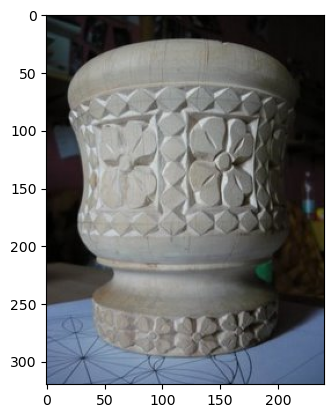

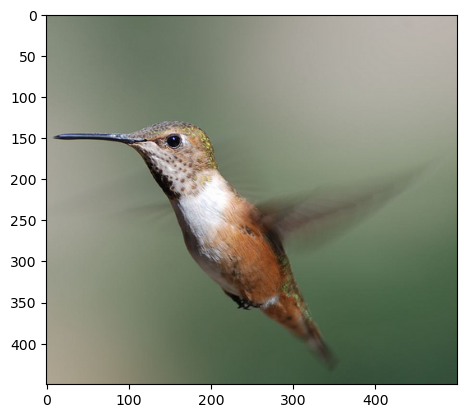

In [25]:
# data get shuffled every time iterator is created

dataiter_train1 = iter(dataloader_train)
img_train1, label_train1 = next(dataiter_train1)
plt.imshow(img_train1[0].permute(1, 2, 0))
plt.show()

dataiter_train2 = iter(dataloader_train)
img_train2, label_train2 = next(dataiter_train2)
plt.imshow(img_train2[0].permute(1, 2, 0))
plt.show()

## Inspect Transforms

In [106]:
dataset_name = 'imagenet2012'
img_h = 256
img_w = 256
imgs_mean = (0.0, 0.0, 0.0)
imgs_std = (1.0, 1.0, 1.0)

brightness = 0.75
contrast = 0.75
saturation = 0.75
hue = 0.1
degrees = 7
scale_min = 0.25
scale_max = 3.0
ratio_min = 3.0 / 4.0
ratio_max = 4.0 / 3.0

In [3]:
def show_img(img):
    plt.imshow(img.permute(1, 2, 0))
    plt.show()

No transforms

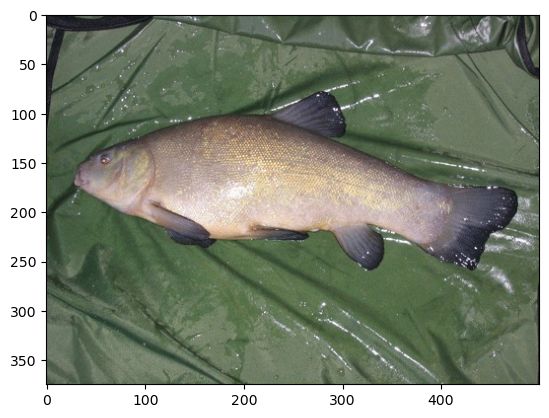

In [4]:
data_dir = os.path.join('../data', dataset_name)
dataset_train = torchvision.datasets.ImageNet(
    data_dir, split='train',
    transform=transforms.Compose([
        transforms.ToTensor()
    ])
)
show_img(dataset_train[2][0])

Training transforms

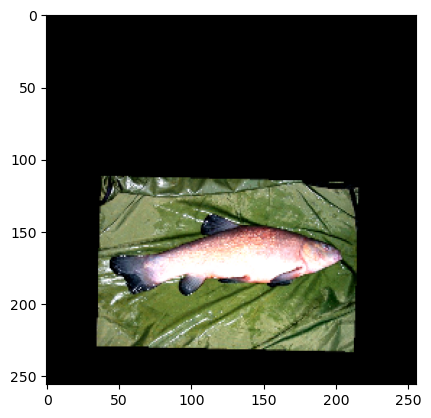

In [116]:
data_dir = os.path.join('../data', dataset_name)
dataset_train = torchvision.datasets.ImageNet(
    data_dir, split='train',
    transform=transforms.Compose([
        v2.ToImage(),
        v2.ColorJitter(brightness=brightness, contrast=contrast, saturation=saturation, hue=hue),
        v2.RandomZoomOut(fill={tv_tensors.Image: (0, 0, 0), "others": 0}, side_range=(1.0, scale_max)),
        v2.RandomRotation(degrees=degrees),
        v2.RandomResizedCrop(size=(img_h, img_w), scale=(scale_min, 1.0), ratio=(ratio_min, ratio_max)),
        v2.RandomHorizontalFlip(p=0.5),
        v2.ToDtype(torch.float32, scale=True),
        v2.Normalize(mean=imgs_mean, std=imgs_std),
    ])
)
show_img(dataset_train[2][0])

Validation transforms

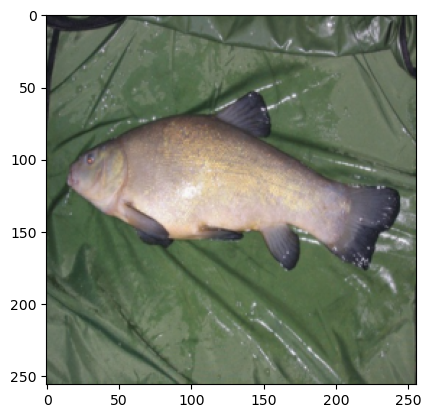

In [117]:
data_dir = os.path.join('../data', dataset_name)
dataset_train = torchvision.datasets.ImageNet(
    data_dir, split='train', # split='val'
    transform=transforms.Compose([
        transforms.Resize(size=(img_h, img_w)),
        transforms.CenterCrop(size=(img_h, img_w)),
        transforms.ToTensor(),
        transforms.Normalize(mean=imgs_mean, std=imgs_std)
    ])
)
show_img(dataset_train[2][0])